In [ ]:
vi employee.csv
cat employee.csv

In [ ]:
CREATE TABLE employee
    > (id int,
    > name string,
    > skills array<string>)
    > ROW FORMAT DELIMITED 
    > FIELDS TERMINATED BY ','
    > COLLECTION ITEMS TERMINATED BY ':';


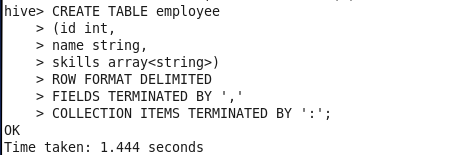

In [ ]:
LOAD DATA LOCAL INPATH '/home/acadgild/material/employee.csv'
    > INTO TABLE employee;

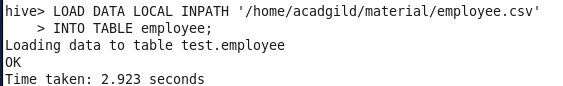

In [ ]:
SELECT * FROM employee;


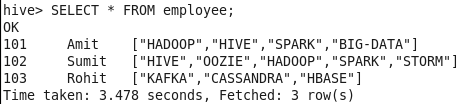

In [ ]:
SELECT size(skills),array_contains(skills,'HADOOP'),
    > sort_array(skills),concat_ws("|",skills) FROM employee;

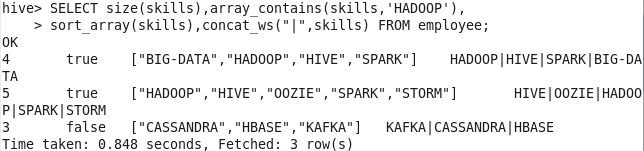

In [ ]:
SELECT explode(skills) AS skills FROM 
    > employee;

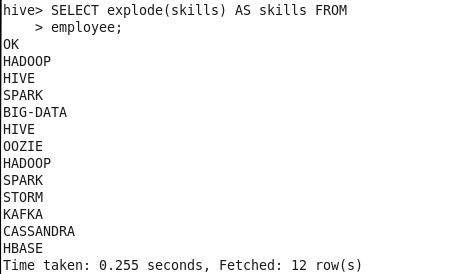

In [ ]:
SELECT id,name,skill FROM employee LATERAL VIEW
    > explode(skills) skill_set AS skill;


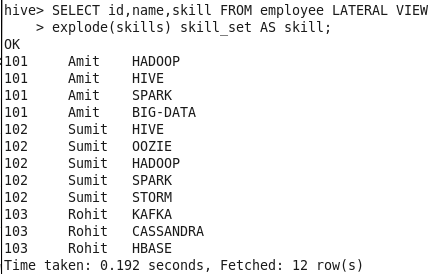


In [ ]:
CREATE TABLE emp_details_partitioned
    > (emp_name string,
    > unit string,
    > exp int)
    > PARTITIONED BY(location string);


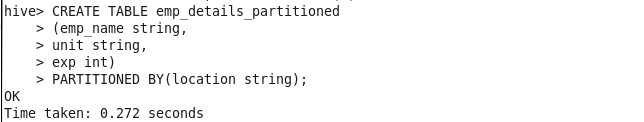

In [ ]:
SELECT * FROM emp_details;


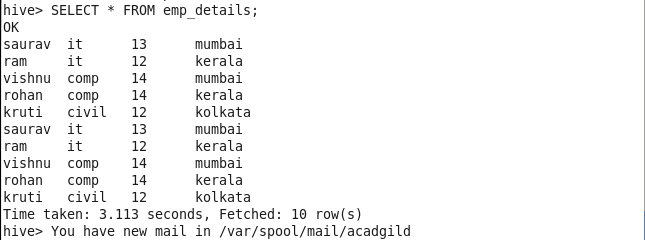

In [ ]:
INSERT OVERWRITE TABLE emp_details_partitioned
    > PARTITION (location="mumbai") SELECT emp_name,unit,
    > exp FROM emp_details WHERE location="mumbai";


In [ ]:
SHOW PARTITIONS emp_details_partitioned;

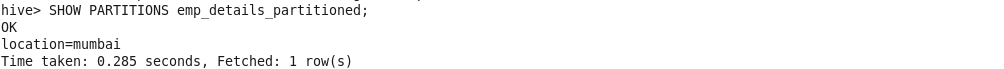

In [ ]:
hdfs dfs -ls /user/hive/warehouse/test.db/emp_details_partitioned


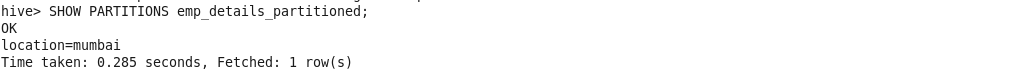

In [ ]:
SET hive.exec.dynamic.partition.mode=nonstrict;

In [ ]:
INSERT OVERWRITE TABLE emp_details_partitioned PARTITION (location) SELECT * 
    > FROM emp_details;

In [ ]:
 hdfs dfs -ls /user/hive/warehouse/test.db/emp_details_partitioned


In [ ]:
ALTER TABLE emp_details_partitioned DROP PARTITION(location="mumbai");


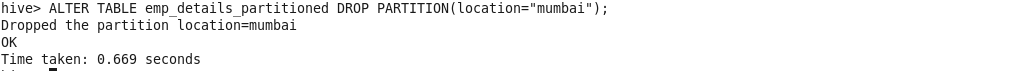

In [ ]:
hdfs dfs -ls /user/hive/warehouse/test.db/emp_details_partitioned


In [ ]:
 SELECT * FROM buck_users TABLESAMPLE 
    > (BUCKET 3 OUT OF 10 ON rand())s;


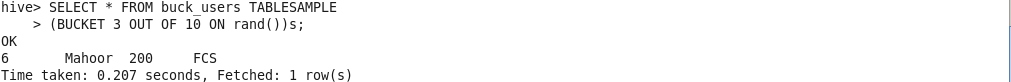

In [ ]:
CREATE TABLE buck_users
    > (id int,
    > name string,
    > salary int,
    > unit string)
    > CLUSTERED BY (id)
    > SORTED BY (id)
    > INTO 2 BUCKETS;


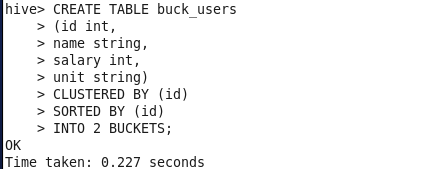

In [ ]:
 vi users.txt
cat users.txt

In [ ]:
CREATE TABLE users
    > (id int,
    > name string,
    > exp int,
    > unit string)
    > ROW FORMAT DELIMITED
    > FIELDS TERMINATED BY '\t';


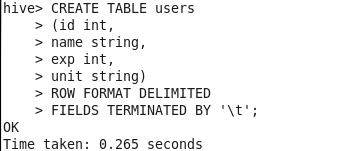

In [ ]:
 LOAD DATA LOCAL INPATH '/home/acadgild/material/users.txt'
    > INTO TABLE users;

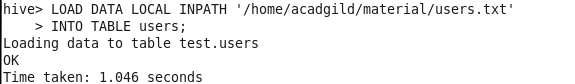

In [ ]:
SET hive.enforce.bucketing=true;

In [ ]:
INSERT OVERWRITE TABLE buck_users 
    > SELECT * FROM users;

In [ ]:
SHOW CREATE TABLE buck_users;

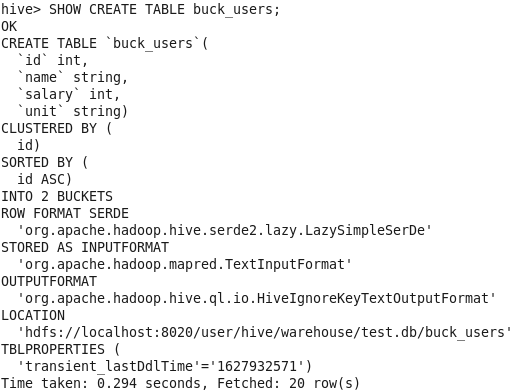

In [ ]:
hdfs dfs -ls /user/hive/warehouse/test.db/buck_users

In [ ]:
hdfs dfs -cat /user/hive/warehouse/test.db/buck_users/000000_0

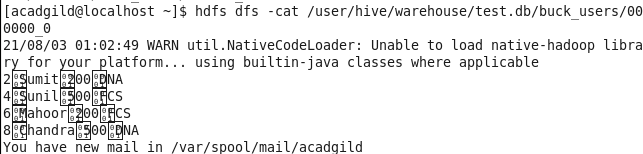

In [ ]:
hdfs dfs -cat /user/hive/warehouse/test.db/buck_users/000001_0

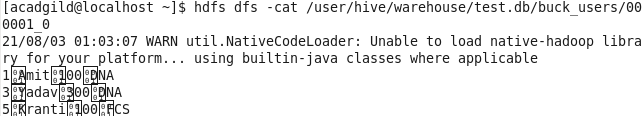

In [ ]:
CREATE TABLE locations(
    > id int,
    > location string)
    > ROW FORMAT DELIMITED 
    > FIELDS TERMINATED BY '\t';


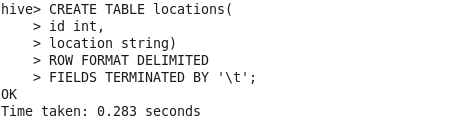

In [ ]:
LOAD DATA LOCAL INPATH '/home/acadgild/material/locations.txt' INTO
    > TABLE locations;


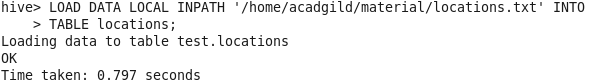

In [ ]:
SELECT * FROM locations;

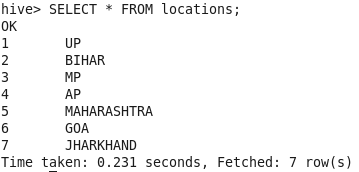

In [ ]:
DROP TABLE users;


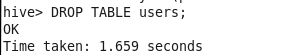

In [ ]:
 CREATE TABLE users(
    > id int,
    > name string,
    > salary int,
    > unit string)
    > ROW FORMAT DELIMITED
    > FIELDS TERMINATED BY '\t';

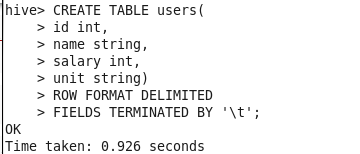

In [ ]:
LOAD DATA LOCAL INPATH '/home/acadgild/material/users.txt'
    > INTO TABLE users;

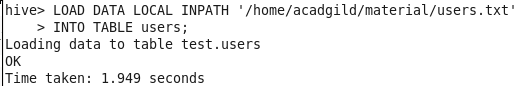

In [ ]:
SELECT * FROM USERS;

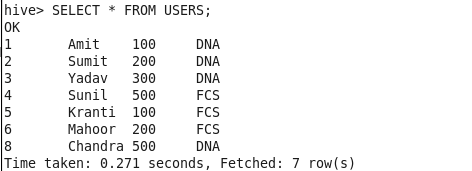

In [ ]:
SET hive.cbo.enable=true;
SET hive.compute.query.using.stats=true;
SET hive.stats.fetch.column.stats=true;
SET hive.stats.fetch.partition.stats=true;
SELECT MAX(id) FROM users;

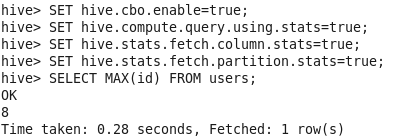

In [ ]:
EXPLAIN SELECT MAX(id) FROM users;

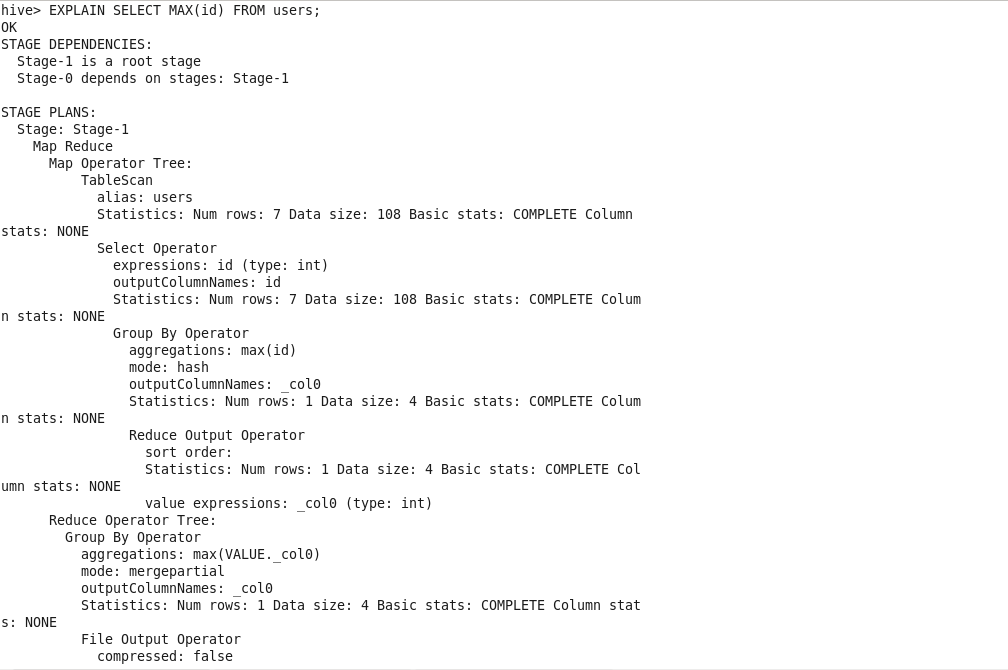
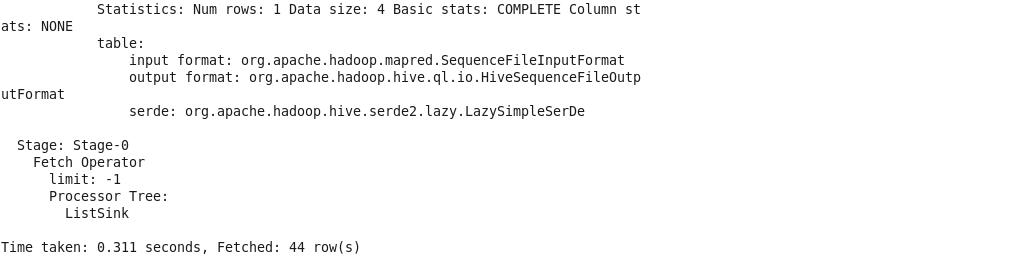

In [ ]:
SET hive.vectorized.execution.enabled=true;
SET hive.vectorized.execution.reduce.enabled=true;
EXPLAIN SELECT MAX(id) FROM users;

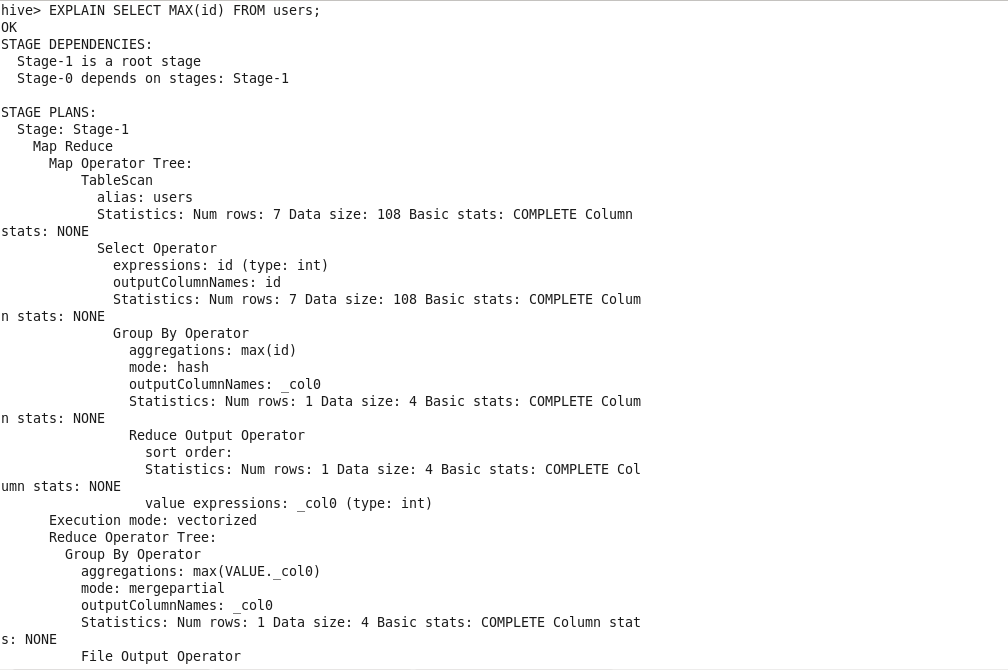
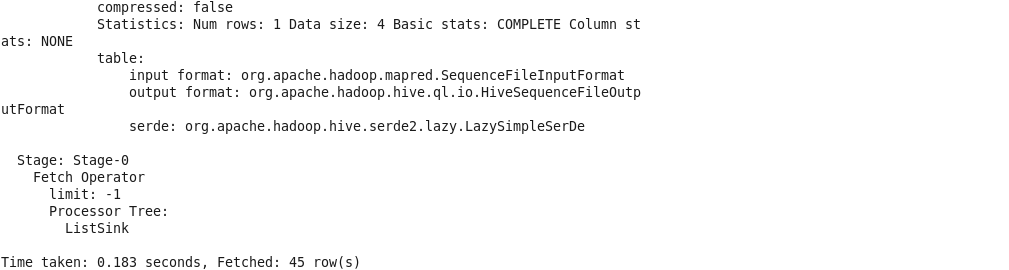